In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


In [95]:
# path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"

In [103]:
# Analysis of the answers given after movement to the target was made (i.e. visual-proprioceptive condition)
files = os.listdir(path)

dataFrame = None 
correct = 0 #np.ones(len(files))
responseVal = 0

for i in range(len(files)):
    
    filez = "Answer" in files[i] 
        
    if filez:
        
        data = pd.read_csv(path + files[i],sep=':', header=[0,1,2])
#         data = pd.read_fwf(path + files[i],sep=':', header=[0,1,2])

#----------------------------------------------------------------------------
        fName = files[i]
        fNameS = fName.split('_')
        print(fNameS)
#         print(float(fNameS[6]))
        
        try:
            propVal = float(fNameS[6])
        except Exception as e:
            print(e)
            replText = fNameS[6].replace("," , ".")
            print(replText)
            propVal = float(replText)
    
        targPos = data.iloc[0]["Name" == "Target_Position"]
        stiPos = data.iloc[1]["Name" == "Stimulus_Position"]
        reHPos = data.iloc[2]["Name" == "RealHand_Position"]
        stzPos = data.iloc[3]["Name" == "StartZone_Position"]
        resPos = data.iloc[4]["Name" == "Response"]
        
        if "Y" in resPos:
            responseVal = 1
        else:
            responseVal = 0
        
        tp = targPos.split(',')
        sp = stiPos.split(',')
        rep = reHPos.split(',')
        szP = stzPos.split(',')

        tpf =(float(tp[2]))
        spf = (float(sp[2]))
        rpf = (float(rep[2]))
        szf = (float(szP[2]))

        diffPos = np.absolute(tpf-spf)
        realVsVirtHand = np.absolute(rpf-spf)

#         print(round(result,4))
#         print(resPos)
    
    #-------------------------------------------------
    # if the proprioceptive value is positive and the answer is yes, then that is incorrect 
    # if the proprioceptive value is negative and the answer is yes, then that is correct 

        if propVal > 0.0 and 'Y' in resPos:
            correct = 0
        if propVal < 0.0 and 'Y' in resPos:
            correct = 1
        if propVal > 0.0 and 'N'in resPos:
            correct = 1
        if propVal < 0.0 and 'N' in resPos:
            correct = 0
        if propVal == 0.0:
            correct = 2

    #-------------------------------------------------
    
        rawValues = list((tpf,spf,rpf,szf,realVsVirtHand,propVal,diffPos,resPos,correct))
        tmpValues = pd.DataFrame([rawValues],columns=['TargetPos','StimulusPos','RealHandPos','StartZone','Real2VirtHandDiff','ProprioceptiveVal','Target2StimDiff','Response','Answer'])
        
        tmpValues.insert(0, "Trial", fNameS[7][0] , True)
        tmpValues.insert(0, "Participant_ID", fNameS[2] , True)
        
        if dataFrame is None:
            dataFrame = tmpValues
        else:
            dataFrame = pd.concat((dataFrame, tmpValues)) 
    
#----------------------------------------------------------------------------       

['1602405451', 'Answer', '379d850213', 'Trg', '0', 'Prop', '0.05', '0.txt']
['1602405455', 'Answer', '379d850213', 'Trg', '0.2', 'Prop', '0', '1.txt']
['1602405460', 'Answer', '379d850213', 'Trg', '0', 'Prop', '-0.025', '2.txt']
['1602405463', 'Answer', '379d850213', 'Trg', '-0.2', 'Prop', '-0.05', '3.txt']
['1602405466', 'Answer', '379d850213', 'Trg', '-0.2', 'Prop', '0.025', '4.txt']
['1602405472', 'Answer', '379d850213', 'Trg', '0.2', 'Prop', '0.1', '5.txt']
['1602795658', 'Answer', '379d850213', 'Trg', '0', 'Prop', '0.05', '0.txt']
['1602795663', 'Answer', '379d850213', 'Trg', '0', 'Prop', '-0.025', '1.txt']
['1602795667', 'Answer', '379d850213', 'Trg', '-0.2', 'Prop', '-0.05', '2.txt']
['1602795670', 'Answer', '379d850213', 'Trg', '0.2', 'Prop', '0.1', '3.txt']
['1602795673', 'Answer', '379d850213', 'Trg', '-0.2', 'Prop', '0.025', '4.txt']
['1602795678', 'Answer', '379d850213', 'Trg', '0.2', 'Prop', '0', '5.txt']
['1602795679', 'Answer', '379d850213', 'Trg', '0.2', 'Prop', '0', '5

['1603465881', 'Answer', '08727a345f', 'Trg', '-0.2', 'Prop', '0.025', '1.txt']
['1603465900', 'Answer', '08727a345f', 'Trg', '-0.2', 'Prop', '0.025', '1.txt']
['1603465906', 'Answer', '08727a345f', 'Trg', '0.2', 'Prop', '-0.025', '3.txt']
['1603465907', 'Answer', '08727a345f', 'Trg', '0.2', 'Prop', '-0.025', '3.txt']
['1603465915', 'Answer', '08727a345f', 'Trg', '0', 'Prop', '-0.05', '4.txt']
['1603465919', 'Answer', '08727a345f', 'Trg', '-0.2', 'Prop', '-0.1', '5.txt']
['1603465924', 'Answer', '08727a345f', 'Trg', '0.2', 'Prop', '0', '6.txt']
['1603465928', 'Answer', '08727a345f', 'Trg', '-0.2', 'Prop', '0.1', '7.txt']
['1603465933', 'Answer', '08727a345f', 'Trg', '0', 'Prop', '-0.1', '8.txt']
['1603465940', 'Answer', '08727a345f', 'Trg', '-0.2', 'Prop', '0.025', '9.txt']
['1603465946', 'Answer', '08727a345f', 'Trg', '0', 'Prop', '-0.025', '10.txt']
['1603465952', 'Answer', '08727a345f', 'Trg', '0', 'Prop', '0.05', '11.txt']
['1603465958', 'Answer', '08727a345f', 'Trg', '0.2', 'Prop'

['1608984828', 'Answer', 'ea31d92230', 'Trg', '0', 'Prop', '0,1', '27.txt']
could not convert string to float: '0,1'
0.1
['1608984830', 'Answer', 'ea31d92230', 'Trg', '-0,2', 'Prop', '0,05', '28.txt']
could not convert string to float: '0,05'
0.05
['1608984834', 'Answer', 'ea31d92230', 'Trg', '-0,2', 'Prop', '-0,05', '29.txt']
could not convert string to float: '-0,05'
-0.05
['1608984838', 'Answer', 'ea31d92230', 'Trg', '0,2', 'Prop', '0,1', '30.txt']
could not convert string to float: '0,1'
0.1
['1608984842', 'Answer', 'ea31d92230', 'Trg', '0', 'Prop', '0,1', '31.txt']
could not convert string to float: '0,1'
0.1
['1608984846', 'Answer', 'ea31d92230', 'Trg', '0,2', 'Prop', '0,05', '32.txt']
could not convert string to float: '0,05'
0.05
['1608984853', 'Answer', 'ea31d92230', 'Trg', '0', 'Prop', '-0,025', '33.txt']
could not convert string to float: '-0,025'
-0.025
['1608984860', 'Answer', 'ea31d92230', 'Trg', '-0,2', 'Prop', '0,1', '34.txt']
could not convert string to float: '0,1'
0.

['1609613318', 'Answer', '83ea3b75be', 'Trg', '0', 'Prop', '-0.05', '30.txt']
['1609613323', 'Answer', '83ea3b75be', 'Trg', '0.2', 'Prop', '-0.025', '31.txt']
['1609613326', 'Answer', '83ea3b75be', 'Trg', '0', 'Prop', '-0.025', '32.txt']
['1609613330', 'Answer', '83ea3b75be', 'Trg', '0.2', 'Prop', '0.1', '33.txt']
['1609613333', 'Answer', '83ea3b75be', 'Trg', '-0.2', 'Prop', '-0.1', '34.txt']
['1609626669', 'Answer', '331a150c14', 'Trg', '-0.2', 'Prop', '-0.05', '0.txt']
['1609626716', 'Answer', '331a150c14', 'Trg', '-0.2', 'Prop', '0.05', '1.txt']
['1609626742', 'Answer', '331a150c14', 'Trg', '-0.2', 'Prop', '-0.1', '3.txt']
['1609626749', 'Answer', '331a150c14', 'Trg', '0.2', 'Prop', '0.1', '4.txt']
['1609626760', 'Answer', '331a150c14', 'Trg', '0', 'Prop', '0.1', '5.txt']
['1609626767', 'Answer', '331a150c14', 'Trg', '0.2', 'Prop', '-0.1', '6.txt']
['1609626779', 'Answer', '331a150c14', 'Trg', '0.2', 'Prop', '0', '7.txt']
['1609626783', 'Answer', '331a150c14', 'Trg', '0', 'Prop', '0

['1609715761', 'Answer', '7c42d20493', 'Trg', '-0.2', 'Prop', '-0.05', '6.txt']
['1609715766', 'Answer', '7c42d20493', 'Trg', '-0.2', 'Prop', '-0.05', '7.txt']
['1609715771', 'Answer', '7c42d20493', 'Trg', '0', 'Prop', '-0.1', '8.txt']
['1609715775', 'Answer', '7c42d20493', 'Trg', '0.2', 'Prop', '0.1', '9.txt']
['1609715782', 'Answer', '7c42d20493', 'Trg', '-0.2', 'Prop', '0.025', '10.txt']
['1609715787', 'Answer', '7c42d20493', 'Trg', '-0.2', 'Prop', '0.1', '11.txt']
['1609715791', 'Answer', '7c42d20493', 'Trg', '0.2', 'Prop', '-0.1', '12.txt']
['1609715797', 'Answer', '7c42d20493', 'Trg', '0.2', 'Prop', '0', '13.txt']
['1609736872', 'Answer', '5f08497baa', 'Trg', '0.2', 'Prop', '-0.05', '0.txt']
['1609736945', 'Answer', '5f08497baa', 'Trg', '-0.2', 'Prop', '-0.025', '1.txt']
['1609736963', 'Answer', '5f08497baa', 'Trg', '0', 'Prop', '-0.025', '2.txt']
['1609736993', 'Answer', '5f08497baa', 'Trg', '0.2', 'Prop', '-0.1', '3.txt']
['1609737010', 'Answer', '5f08497baa', 'Trg', '0', 'Prop

['1610195637', 'Answer', 'ff97977261', 'Trg', '0', 'Prop', '0', '10.txt']
['1610195642', 'Answer', 'ff97977261', 'Trg', '0', 'Prop', '0,1', '11.txt']
could not convert string to float: '0,1'
0.1
['1610219698', 'Answer', '60603f4950', 'Trg', '0', 'Prop', '0', '0.txt']
['1610219826', 'Answer', '60603f4950', 'Trg', '0,2', 'Prop', '0', '1.txt']
['1610219858', 'Answer', '60603f4950', 'Trg', '0', 'Prop', '-0,05', '2.txt']
could not convert string to float: '-0,05'
-0.05
['1610219869', 'Answer', '60603f4950', 'Trg', '-0,2', 'Prop', '-0,025', '3.txt']
could not convert string to float: '-0,025'
-0.025
['1610219877', 'Answer', '60603f4950', 'Trg', '0,2', 'Prop', '-0,025', '4.txt']
could not convert string to float: '-0,025'
-0.025
['1610219885', 'Answer', '60603f4950', 'Trg', '-0,2', 'Prop', '0,1', '5.txt']
could not convert string to float: '0,1'
0.1
['1610219889', 'Answer', '60603f4950', 'Trg', '-0,2', 'Prop', '0,025', '6.txt']
could not convert string to float: '0,025'
0.025
['1610219897', '

['1610227684', 'Answer', 'a7cae9c0ad', 'Trg', '0', 'Prop', '0,1', '32.txt']
could not convert string to float: '0,1'
0.1
['1610227689', 'Answer', 'a7cae9c0ad', 'Trg', '0,2', 'Prop', '-0,1', '33.txt']
could not convert string to float: '-0,1'
-0.1
['1610227691', 'Answer', 'a7cae9c0ad', 'Trg', '-0,2', 'Prop', '-0,025', '34.txt']
could not convert string to float: '-0,025'
-0.025
['1610291435', 'Answer', '777e8e8fc6', 'Trg', '-0.2', 'Prop', '0', '0.txt']
['1610291458', 'Answer', '777e8e8fc6', 'Trg', '0.2', 'Prop', '-0.025', '1.txt']
['1610291466', 'Answer', '777e8e8fc6', 'Trg', '-0.2', 'Prop', '0.025', '2.txt']
['1610291475', 'Answer', '777e8e8fc6', 'Trg', '0.2', 'Prop', '0', '3.txt']
['1610291484', 'Answer', '777e8e8fc6', 'Trg', '-0.2', 'Prop', '0.05', '4.txt']
['1610291501', 'Answer', '777e8e8fc6', 'Trg', '-0.2', 'Prop', '-0.025', '6.txt']
['1610291501', 'Answer', '777e8e8fc6', 'Trg', '0', 'Prop', '0', '5.txt']
['1610296386', 'Answer', '217b6ea91b', 'Trg', '0.2', 'Prop', '-0.025', '0.tx

['1610556002', 'Answer', '3943744cd5', 'Trg', '0.2', 'Prop', '0', '6.txt']
['1610556005', 'Answer', '3943744cd5', 'Trg', '-0.2', 'Prop', '0', '7.txt']
['1610556006', 'Answer', '3943744cd5', 'Trg', '0.2', 'Prop', '0.1', '8.txt']
['1610556010', 'Answer', '3943744cd5', 'Trg', '0.2', 'Prop', '0.1', '8.txt']
['1610556014', 'Answer', '3943744cd5', 'Trg', '0.2', 'Prop', '-0.05', '9.txt']
['1610556018', 'Answer', '3943744cd5', 'Trg', '0.2', 'Prop', '-0.1', '10.txt']
['1610556021', 'Answer', '3943744cd5', 'Trg', '0', 'Prop', '-0.025', '11.txt']
['1610556024', 'Answer', '3943744cd5', 'Trg', '0.2', 'Prop', '-0.1', '12.txt']
['1610556028', 'Answer', '3943744cd5', 'Trg', '0.2', 'Prop', '-0.05', '13.txt']
['1610556032', 'Answer', '3943744cd5', 'Trg', '-0.2', 'Prop', '-0.05', '14.txt']
['1610556037', 'Answer', '3943744cd5', 'Trg', '0', 'Prop', '0', '15.txt']
['1610556047', 'Answer', '3943744cd5', 'Trg', '0', 'Prop', '-0.05', '16.txt']
['1610556056', 'Answer', '3943744cd5', 'Trg', '0.2', 'Prop', '0.02

['1610855204', 'Answer', '895bdea1fc', 'Trg', '0', 'Prop', '-0.1', '4.txt']
['1610855209', 'Answer', '895bdea1fc', 'Trg', '-0.2', 'Prop', '-0.025', '5.txt']
['1610855213', 'Answer', '895bdea1fc', 'Trg', '0', 'Prop', '-0.1', '6.txt']
['1610855217', 'Answer', '895bdea1fc', 'Trg', '0', 'Prop', '0.05', '7.txt']
['1610855221', 'Answer', '895bdea1fc', 'Trg', '0', 'Prop', '0.025', '8.txt']
['1610855225', 'Answer', '895bdea1fc', 'Trg', '0', 'Prop', '0', '9.txt']
['1610857617', 'Answer', '97312b6017', 'Trg', '-0.2', 'Prop', '0.05', '0.txt']
['1610857657', 'Answer', '97312b6017', 'Trg', '0.2', 'Prop', '0.025', '1.txt']
['1610857667', 'Answer', '97312b6017', 'Trg', '0.2', 'Prop', '-0.05', '2.txt']
['1610857673', 'Answer', '97312b6017', 'Trg', '-0.2', 'Prop', '0.025', '3.txt']
['1610857682', 'Answer', '97312b6017', 'Trg', '-0.2', 'Prop', '-0.05', '4.txt']
['1610857689', 'Answer', '97312b6017', 'Trg', '0.2', 'Prop', '0.05', '5.txt']
['1610857705', 'Answer', '97312b6017', 'Trg', '0.2', 'Prop', '-0.1

['1610879574', 'Answer', '53b66b850e', 'Trg', '0,2', 'Prop', '0,05', '31.txt']
could not convert string to float: '0,05'
0.05
['1610879585', 'Answer', '53b66b850e', 'Trg', '-0,2', 'Prop', '-0,05', '32.txt']
could not convert string to float: '-0,05'
-0.05
['1610879589', 'Answer', '53b66b850e', 'Trg', '-0,2', 'Prop', '0,05', '33.txt']
could not convert string to float: '0,05'
0.05
['1610879592', 'Answer', '53b66b850e', 'Trg', '-0,2', 'Prop', '-0,025', '34.txt']
could not convert string to float: '-0,025'
-0.025
['1610884400', 'Answer', '4df160bc98', 'Trg', '0', 'Prop', '0', '0.txt']
['1610906716', 'Answer', '34107c6251', 'Trg', '-0.2', 'Prop', '0.1', '0.txt']
['1610906733', 'Answer', '34107c6251', 'Trg', '0.2', 'Prop', '-0.025', '1.txt']
['1610906739', 'Answer', '34107c6251', 'Trg', '-0.2', 'Prop', '-0.05', '2.txt']
['1610906752', 'Answer', '34107c6251', 'Trg', '0', 'Prop', '0.1', '4.txt']
['1610906762', 'Answer', '34107c6251', 'Trg', '-0.2', 'Prop', '0.05', '5.txt']
['1610906787', 'Ans

['1611032819', 'Answer', '37db6ad5e4', 'Trg', '0', 'Prop', '-0.025', '0.txt']
['1611032834', 'Answer', '37db6ad5e4', 'Trg', '-0.2', 'Prop', '-0.1', '1.txt']
['1611032842', 'Answer', '37db6ad5e4', 'Trg', '0.2', 'Prop', '-0.05', '2.txt']
['1611032848', 'Answer', '37db6ad5e4', 'Trg', '0', 'Prop', '0', '3.txt']
['1611032851', 'Answer', '37db6ad5e4', 'Trg', '0', 'Prop', '0.05', '4.txt']
['1611032855', 'Answer', '37db6ad5e4', 'Trg', '0.2', 'Prop', '0.025', '5.txt']
['1611032859', 'Answer', '37db6ad5e4', 'Trg', '-0.2', 'Prop', '-0.05', '6.txt']
['1611032862', 'Answer', '37db6ad5e4', 'Trg', '0.2', 'Prop', '-0.1', '7.txt']
['1611032866', 'Answer', '37db6ad5e4', 'Trg', '0.2', 'Prop', '0', '8.txt']
['1611032869', 'Answer', '37db6ad5e4', 'Trg', '-0.2', 'Prop', '0.05', '9.txt']
['1611032872', 'Answer', '37db6ad5e4', 'Trg', '0.2', 'Prop', '-0.05', '10.txt']
['1611032876', 'Answer', '37db6ad5e4', 'Trg', '0', 'Prop', '-0.05', '11.txt']
['1611032879', 'Answer', '37db6ad5e4', 'Trg', '0.2', 'Prop', '0.05

['1611107390', 'Answer', '93ff4ad1f6', 'Trg', '-0.2', 'Prop', '0.05', '13.txt']
['1611107395', 'Answer', '93ff4ad1f6', 'Trg', '-0.2', 'Prop', '-0.1', '14.txt']
['1611107400', 'Answer', '93ff4ad1f6', 'Trg', '-0.2', 'Prop', '0.1', '15.txt']
['1611107407', 'Answer', '93ff4ad1f6', 'Trg', '-0.2', 'Prop', '-0.05', '16.txt']
['1611107412', 'Answer', '93ff4ad1f6', 'Trg', '-0.2', 'Prop', '-0.05', '17.txt']
['1611107416', 'Answer', '93ff4ad1f6', 'Trg', '-0.2', 'Prop', '0.05', '18.txt']
['1611107422', 'Answer', '93ff4ad1f6', 'Trg', '0.2', 'Prop', '0.1', '19.txt']
['1611107426', 'Answer', '93ff4ad1f6', 'Trg', '0', 'Prop', '0.05', '20.txt']
['1611107430', 'Answer', '93ff4ad1f6', 'Trg', '0', 'Prop', '0.1', '21.txt']
['1611107434', 'Answer', '93ff4ad1f6', 'Trg', '0', 'Prop', '-0.1', '22.txt']
['1611107437', 'Answer', '93ff4ad1f6', 'Trg', '-0.2', 'Prop', '-0.05', '23.txt']
['1611107442', 'Answer', '93ff4ad1f6', 'Trg', '0', 'Prop', '0', '24.txt']
['1611107445', 'Answer', '93ff4ad1f6', 'Trg', '0.2', 'Pr

['1611147073', 'Answer', '34bcedf9ab', 'Trg', '0', 'Prop', '0.1', '15.txt']
['1611147078', 'Answer', '34bcedf9ab', 'Trg', '-0.2', 'Prop', '0.05', '16.txt']
['1611147083', 'Answer', '34bcedf9ab', 'Trg', '0.2', 'Prop', '0.025', '17.txt']
['1611147087', 'Answer', '34bcedf9ab', 'Trg', '0', 'Prop', '0.1', '18.txt']
['1611169683', 'Answer', '73fa9c7de1', 'Trg', '0,2', 'Prop', '-0,1', '0.txt']
could not convert string to float: '-0,1'
-0.1
['1611170088', 'Answer', 'd856850174', 'Trg', '-0.2', 'Prop', '0.025', '0.txt']
['1611170126', 'Answer', 'd856850174', 'Trg', '-0.2', 'Prop', '0.025', '1.txt']
['1611170139', 'Answer', 'd856850174', 'Trg', '0', 'Prop', '-0.05', '2.txt']
['1611170153', 'Answer', 'd856850174', 'Trg', '0.2', 'Prop', '0.1', '3.txt']
['1611170166', 'Answer', 'd856850174', 'Trg', '0.2', 'Prop', '0.025', '4.txt']
['1611170172', 'Answer', 'd856850174', 'Trg', '0', 'Prop', '0.05', '5.txt']
['1611170180', 'Answer', 'd856850174', 'Trg', '-0.2', 'Prop', '-0.1', '6.txt']
['1611170184', 

['1611699525', 'Answer', 'b53c727b6e', 'Trg', '0.2', 'Prop', '-0.025', '0.txt']
['1611699525', 'Answer', 'b53c727b6e', 'Trg', '0', 'Prop', '-0.025', '1.txt']
['1611699529', 'Answer', 'b53c727b6e', 'Trg', '0', 'Prop', '-0.1', '2.txt']
['1611699535', 'Answer', 'b53c727b6e', 'Trg', '-0.2', 'Prop', '0.025', '3.txt']
['1611699540', 'Answer', 'b53c727b6e', 'Trg', '0', 'Prop', '0.1', '4.txt']
['1611699545', 'Answer', 'b53c727b6e', 'Trg', '-0.2', 'Prop', '-0.1', '5.txt']
['1611699569', 'Answer', 'b53c727b6e', 'Trg', '0.2', 'Prop', '-0.05', '9.txt']
['1611699572', 'Answer', 'b53c727b6e', 'Trg', '-0.2', 'Prop', '0.05', '10.txt']
['1611699573', 'Answer', 'b53c727b6e', 'Trg', '0', 'Prop', '0', '11.txt']
['1611699575', 'Answer', 'b53c727b6e', 'Trg', '0.2', 'Prop', '0.025', '8.txt']
['1611699576', 'Answer', 'b53c727b6e', 'Trg', '0', 'Prop', '0', '11.txt']
['1611699579', 'Answer', 'b53c727b6e', 'Trg', '-0.2', 'Prop', '0.1', '12.txt']
['1611699584', 'Answer', 'b53c727b6e', 'Trg', '-0.2', 'Prop', '0.05

['1612158587', 'Answer', '3503cca04a', 'Trg', '-0.2', 'Prop', '0', '19.txt']
['1612158592', 'Answer', '3503cca04a', 'Trg', '0.2', 'Prop', '0', '20.txt']
['1612158598', 'Answer', '3503cca04a', 'Trg', '-0.2', 'Prop', '-0.025', '21.txt']
['1612158605', 'Answer', '3503cca04a', 'Trg', '0.2', 'Prop', '0.05', '22.txt']
['1612158610', 'Answer', '3503cca04a', 'Trg', '0', 'Prop', '0.05', '23.txt']
['1612158617', 'Answer', '3503cca04a', 'Trg', '0.2', 'Prop', '-0.05', '24.txt']
['1612158623', 'Answer', '3503cca04a', 'Trg', '0.2', 'Prop', '0.025', '25.txt']
['1612158628', 'Answer', '3503cca04a', 'Trg', '0.2', 'Prop', '0.1', '26.txt']
['1612158634', 'Answer', '3503cca04a', 'Trg', '0.2', 'Prop', '0.1', '27.txt']
['1612158638', 'Answer', '3503cca04a', 'Trg', '0', 'Prop', '-0.025', '28.txt']
['1612158644', 'Answer', '3503cca04a', 'Trg', '0', 'Prop', '-0.025', '29.txt']
['1612158648', 'Answer', '3503cca04a', 'Trg', '0', 'Prop', '-0.1', '30.txt']
['1612158658', 'Answer', '3503cca04a', 'Trg', '0.2', 'Prop

In [104]:
# Get proprioceptive values 
proprioceptiveVals = dataFrame['ProprioceptiveVal'].unique()
proprioceptiveVals.sort()
print(proprioceptiveVals)

# Get probabilities for perceiving the real hand ahead of the virtual hand for each of the proprioceptive targets
propVals = dataFrame["ProprioceptiveVal"].tolist()
answers = dataFrame["Answer"].tolist()
probabilityAhead1 = []
for i in answers:
    if i == 1:
        probabilityAhead1.append(i)
print("Probability 1 the real hand was ahead: ", np.round(len(probabilityAhead1)/len(answers),3))


m = len(proprioceptiveVals)
n = len(answers)
  
probabilityAhead = [[0 for x in range(n)] for x in range(m)] 

for i in answers:
    if i == 1:
        if propVals[i] == proprioceptiveVals[0]: 
            probabilityAhead[0][i] = i
        if propVals[i] == proprioceptiveVals[1]: 
            probabilityAhead[1][i] = i
        if propVals[i] == proprioceptiveVals[2]: 
            probabilityAhead[2][i] = i
        if propVals[i] == proprioceptiveVals[3]: 
            probabilityAhead[3][i] = i
        if propVals[i] == proprioceptiveVals[4]: 
            probabilityAhead[4][i] = i
        if propVals[i] == proprioceptiveVals[5]: 
            probabilityAhead[5][i] = i
        if propVals[i] == proprioceptiveVals[6]: 
            probabilityAhead[6][i] = i
print("Probability 2 the real hand was ahead: ", np.round(len(probabilityAhead[0])/len(answers),3))

[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]
Probability 1 the real hand was ahead:  0.547
Probability 2 the real hand was ahead:  1.0


In [105]:
dataFrame

,Participant_ID,Trial,TargetPos,StimulusPos,RealHandPos,StartZone,Real2VirtHandDiff,ProprioceptiveVal,Target2StimDiff,Response,Answer
0,379d850213,0,0.332,0.283,-0.110,-0.108,0.393,0.050,0.049,N,1
0,379d850213,1,0.532,0.443,-0.134,-0.108,0.577,0.000,0.089,Y,2
0,379d850213,2,0.332,0.236,-0.121,-0.108,0.357,-0.025,0.096,Y,1
0,379d850213,3,0.132,0.038,-0.081,-0.108,0.119,-0.050,0.094,Y,1
0,379d850213,4,0.132,0.094,-0.118,-0.108,0.212,0.025,0.038,N,1
...,...,...,...,...,...,...,...,...,...,...,...
0,3e5b810325,2,0.332,0.337,0.066,-0.108,0.271,0.025,0.005,N,1
0,3e5b810325,3,0.532,0.557,-0.040,-0.108,0.597,0.100,0.025,N,1
0,3e5b810325,4,0.332,0.319,-0.128,-0.108,0.447,-0.025,0.013,N,0
0,3e5b810325,5,0.132,0.074,-0.033,-0.108,0.107,-0.050,0.058,N,0


In [108]:
# This computes how many times answer was positive (1) in comparison to negative (0)
group1 = dataFrame.groupby('ProprioceptiveVal')
df2 = group1.apply(lambda x: x['Answer'].value_counts())
df2

ProprioceptiveVal   
-0.100             1    133
                   0     81
                   2      4
-0.050             1    131
                   0     80
                   2      1
-0.025             1    141
                   0     89
                   2      4
 0.000             2    222
 0.025             1    139
                   0     81
                   2      9
 0.050             1    146
                   0     68
                   2      6
 0.100             1    159
                   0     52
                   2      5
Name: Answer, dtype: int64

Array:  [133  81 131  80 141  89 222 139   9 146   6 159   5  13]
Total length:  14
Rows:  7
Probabilty Values:  [0.621, 0.621, 0.613, 0.385, 0.942, 0.964, 0.722]


Text(0, 0.5, '\n P(Virthal Hand Closer) \n')

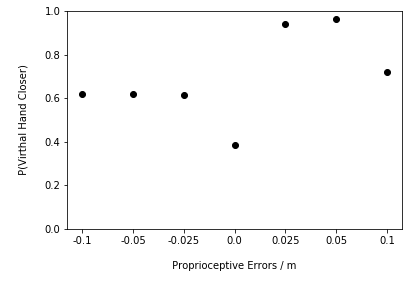

In [195]:
df2l = df2.tolist()

df2ll=np.arange(14)
i = 0
c = 0
for idx,val in enumerate(df2l):
#     if idx % 2 == 0 and idx != 0:
#         continue
    if i == 2:
        i = 0
        continue
    
#     print(idx, ' ', val)
    df2ll[c] = val
    c+=1
    
    i+=1
    
# Get rid of 3rd element of each df2l value 
print("Array: " , (df2ll))
print("Total length: " , len(df2ll))

rows = int(len(df2ll)/2)
print("Rows: ", rows)
columns = 2
df2arr = np.reshape(df2ll,(rows,columns))

propVals = []
for i in range(len(df2arr)):
    lenArr = sum(df2arr[i])
#     print(df2arr[i][0] / lenArr)
    probV = np.round(df2arr[i][0] / lenArr,3)
    if i<3:
        propVals.append(probV)
    else:
        propVals.append(1.0-probV)


print("Probabilty Values: ", propVals)
plt.plot(propVals,'ko')
plt.ylim([0.0,1.0])
xVals = np.arange(len(propVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n Proprioceptive Errors / m \n")
plt.ylabel("\n P(Virthal Hand Closer) \n")

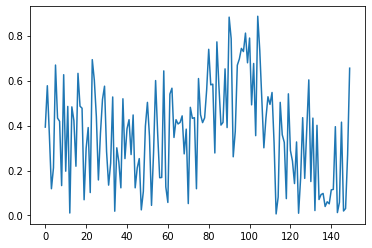

In [8]:
# Plot difference betweeen the real and virtual hand throughout the task 
r2vDiff = []
for i, row in dataFrame.iterrows():
    r2vDiff.append(row['Real2VirtHandDiff']) 
plt.plot(r2vDiff)

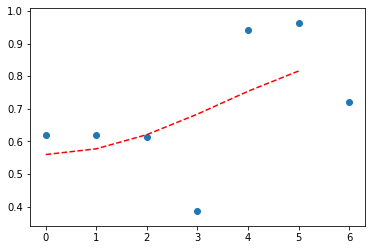

In [223]:
# Curve fitting part 
from scipy.optimize import curve_fit

# define the true objective function
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

def objectiveSig(x, a, b, c):
    return 1. / (1 + np.exp( -((x-a)/b) +c ))

def objectiveSig2(x, a, b, c, d):
    return 1. / (1 + np.exp(-((x*x-a)/b)) + c * (np.exp(-((x-a)/b))))

def sigmoidFunc(x):
    1/(1 + np.exp(-x)) 

def objectivePol(x, a,b,c):
    return a*pow(x,2)+b*x+c

# choose the input and output variables
x = xVals
y = propVals

# curve fit
popt, _ = curve_fit(objectiveSig2, x, y)

# summarize the parameter values
# a, b, c, d, e, f = popt
a, b, c = popt

# plot input vs output
plt.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
# y_line = objective(x_line, a, b, c, d, e, f)
y_line = objectiveSig2(x_line, a, b, c)


# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()


[81.52261733  4.91055876]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  


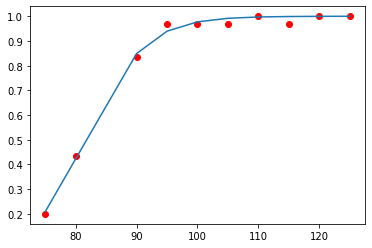

In [206]:
import numpy as np
from scipy.optimize import curve_fit
import scipy as sy
import matplotlib.pyplot as plt

d = np.array([75, 80, 90, 95, 100, 105, 110, 115, 120, 125], dtype=float)
p2 = np.array([6, 13, 25, 29, 29, 29, 30, 29, 30, 30], dtype=float) / 30. # scale to 0..1

# psychometric function
def pf(x, alpha, beta):
    return 1. / (1 + np.exp( -(x-alpha)/beta ))

# fitting
par0 = sy.array([100., 1.]) # use some good starting values, reasonable default is [0., 1.]
par, mcov = curve_fit(pf, d, p2, par0)
print(par)
plt.plot(d, p2, 'ro')
plt.plot(d, pf(d, par[0], par[1]))
plt.show()